In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import properscoring as ps
import matplotlib.pyplot as plt

In [2]:
import letkf_forecasting.letkf_io as letkf_io
import letkf_forecasting.tmh_plot as tmt_plot
import letkf_forecasting.analyse_results as analyse_results
import letkf_forecasting.prepare_sat_data as prepare_sat_data

In [3]:
%matplotlib inline

In [5]:
hdf_truth = pd.read_hdf('/a2/uaren/travis/data/satellite_data/cloudiness_index.h5')

In [6]:
truth_numpy = hdf_truth.values.ravel()

In [7]:
truth_numpy = truth_numpy[~np.isnan(truth_numpy)]

In [8]:
truth_numpy = truth_numpy.clip(min=0, max=1)

In [9]:
clear_ub = 0.1
thin_ub = 0.4

Text(0.5,1,'40 bins 0 to 1')

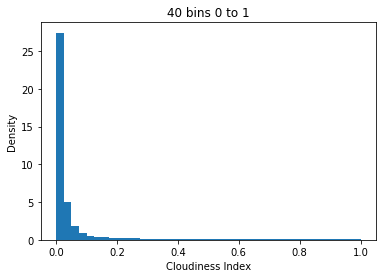

In [10]:
plt.figure()
hist = plt.hist(truth_numpy, bins=40, normed=True)
plt.xlabel('Cloudiness Index')
plt.ylabel('Density')
plt.title('40 bins 0 to 1')

Text(0.5,1,'40 bins 0 to 0.1')

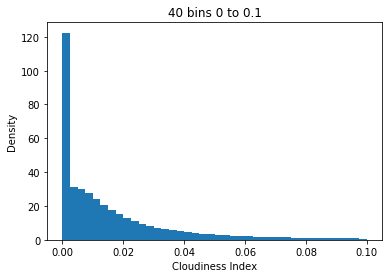

In [11]:
plt.figure()
hist = plt.hist(truth_numpy, bins=40, range=(0, clear_ub), normed=True)
plt.xlabel('Cloudiness Index')
plt.ylabel('Density')
plt.title(f'40 bins 0 to {clear_ub}')

Text(0.5,1,'40 bins 0.1 to 1')

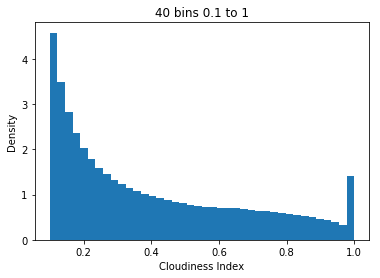

In [12]:
plt.figure()
hist = plt.hist(truth_numpy, bins=40, range=(clear_ub, 1), normed=True)
plt.xlabel('Cloudiness Index')
plt.ylabel('Density')
plt.title(f'40 bins {clear_ub} to 1')

Text(0.5,1,'40 bins 0.1 to 0.4')

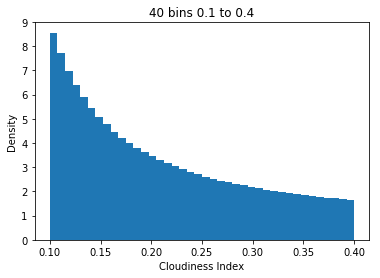

In [13]:
plt.figure()
hist = plt.hist(truth_numpy, bins=40, range=(clear_ub, thin_ub), normed=True)
plt.xlabel('Cloudiness Index')
plt.ylabel('Density')
plt.title(f'40 bins {clear_ub} to {thin_ub}')

Text(0.5,1,'40 bins 0.4 to 1')

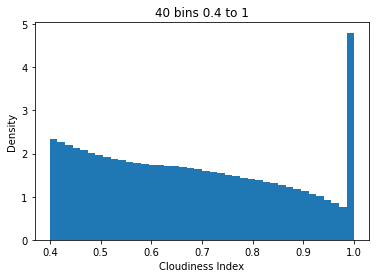

In [14]:
plt.figure()
hist = plt.hist(truth_numpy, bins=40, range=(thin_ub, 1), normed=True)
plt.xlabel('Cloudiness Index')
plt.ylabel('Density')
plt.title(f'40 bins {thin_ub} to 1')

Text(0.5,1,'3 bins 0 to 1')

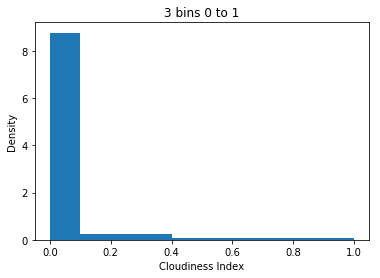

In [15]:
plt.figure()
hist = plt.hist(truth_numpy, bins=[0, clear_ub, thin_ub, 1], normed=True)
plt.xlabel('Cloudiness Index')
plt.ylabel('Density')
plt.title('3 bins 0 to 1')

In [183]:
weights = hist[0]
bins = hist[1]

In [184]:
def ktm_fun(CI):
    to_return = (2.36*CI**5 
                 - 6.2*CI**4 
                 + 6.22*CI**3 
                 - 2.63*CI**2 
                 - 0.58*CI 
                 + 1)
    return to_return

In [185]:
def CSI_fun(CI):
    return ktm_fun(CI)*(0.0001*ktm_fun(CI)*1000 + 0.9)

In [186]:
print(f'Clear CI range: ({bins[0]}, {bins[1]})')
print(f'Clear CSI range: ({CSI_fun(bins[0])}, {CSI_fun(bins[1])})')
print('Clear weight: ', weights[0])
print('Clear Prob: ', weights[0]*(bins[1] - bins[0]), '\n')

print(f'Thin CI range: ({bins[1]}, {bins[2]})')
print(f'Thin CSI range: ({CSI_fun(bins[1])}, {CSI_fun(bins[2])})')
print('Thin weight: ', weights[1])
print('Thin Prob: ', weights[1]*(bins[2] - bins[1]), '\n')

print(f'Thin CI range: ({bins[2]}, {bins[3]})')
print(f'Thin CSI range: ({CSI_fun(bins[2])}, {CSI_fun(bins[3])})')
print('Thick weight: ', weights[2])
print('Thick Prob: ', weights[2]*(bins[3] - bins[2]), '\n')

Clear CI range: (0.0, 0.05)
Clear CSI range: (1.0, 0.9618022875431138)
Clear weight:  16.2208639617
Clear Prob:  0.811043198085 

Thin CI range: (0.05, 0.4)
Thin CSI range: (0.9618022875431138, 0.586952433565696)
Thin weight:  0.397883062939
Thin Prob:  0.139259072029 

Thin CI range: (0.4, 1.0)
Thin CSI range: (0.586952433565696, 0.15588999999999964)
Thick weight:  0.0828295498107
Thick Prob:  0.0496977298864 



<IPython.core.display.Javascript object>


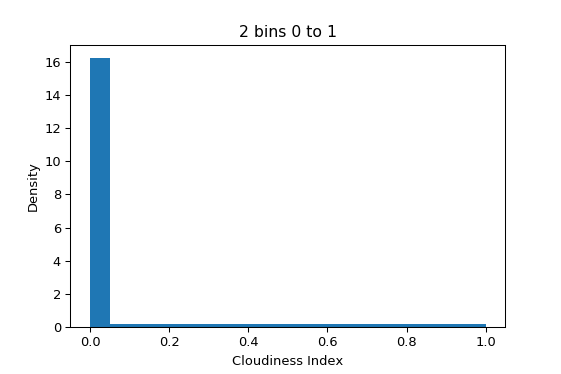

Text(0.5,1,'2 bins 0 to 1')

In [187]:
plt.figure()
hist = plt.hist(truth_numpy, bins=[0, clear_ub, 1], normed=True)
plt.xlabel('Cloudiness Index')
plt.ylabel('Density')
plt.title('2 bins 0 to 1')

In [188]:
weights = hist[0]
bins = hist[1]

In [170]:
print(f'Clear CI range: ({bins[0]}, {bins[1]})')
print(f'Clear CSI range: ({CSI_fun(bins[0])}, {CSI_fun(bins[1])})')
print('Clear weight: ', weights[0])
print('Clear Prob: ', weights[0]*(bins[1] - bins[0]), '\n')

print(f'Cloudy CI range: ({bins[1]}, {bins[2]})')
print(f'Cloudy CSI range: ({CSI_fun(bins[1])}, {CSI_fun(bins[2])})')
print('Cloudy weight: ', weights[1])
print('Cloudy Prob: ', weights[1]*(bins[2] - bins[1]), '\n')

Clear CI range: (0.0, 0.025)
Clear CSI range: (1.0, 0.9823718994550338)
Clear weight:  27.4427760341
Clear Prob:  0.686069400852 

Cloudy CI range: (0.025, 1.0)
Cloudy CSI range: (0.9823718994550338, 0.15588999999999964)
Cloudy weight:  0.32198010169
Cloudy Prob:  0.313930599148 



(0, 1)

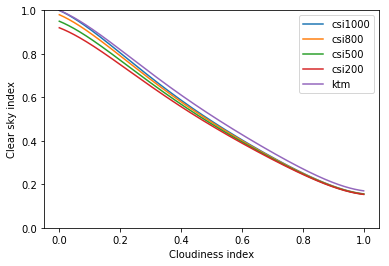

In [171]:
CI = np.linspace(0, 1, 1000)
ktm = ktm_fun(CI)
CSI1000 = ktm*(0.0001*ktm*1000 + 0.9)
CSI800 = ktm*(0.0001*ktm*800 + 0.9)
CSI500 = ktm*(0.0001*ktm*500 + 0.9)
CSI200 = ktm*(0.0001*ktm*200 + 0.9)
plt.figure()
plt.plot(CI, CSI1000)
plt.plot(CI, CSI800)
plt.plot(CI, CSI500)
plt.plot(CI, CSI200)
plt.plot(CI, ktm)
plt.legend(['csi1000', 'csi800', 'csi500', 'csi200', 'ktm'])
plt.xlabel('Cloudiness index')
plt.ylabel('Clear sky index')
plt.ylim([0, 1])

In [172]:
year = 2014
month = 5
day = 29
base_folder = '/a2/uaren/travis/'

In [173]:
truth = xr.open_dataset(f'{base_folder}data/{year:04}/{month:02}/{day:02}/data.nc')

In [174]:
truth = truth['ci']
truth = letkf_io.add_crop_attributes(truth)
truth_full = truth.copy()
truth = analyse_results.return_error_domain(truth)

In [175]:
%matplotlib notebook

In [176]:
from matplotlib import colors

In [156]:
truth.max()

<xarray.DataArray 'ci' ()>
array(1.3223108283742762)

<IPython.core.display.Javascript object>


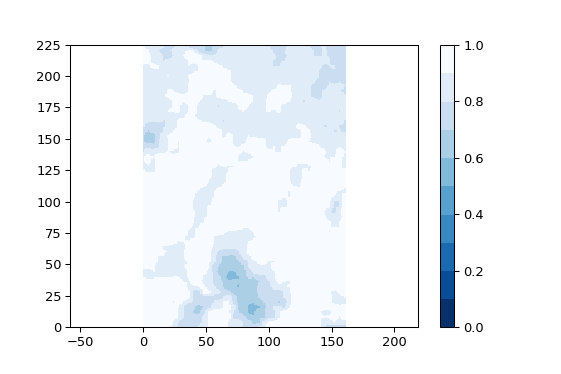

<IPython.core.display.Javascript object>


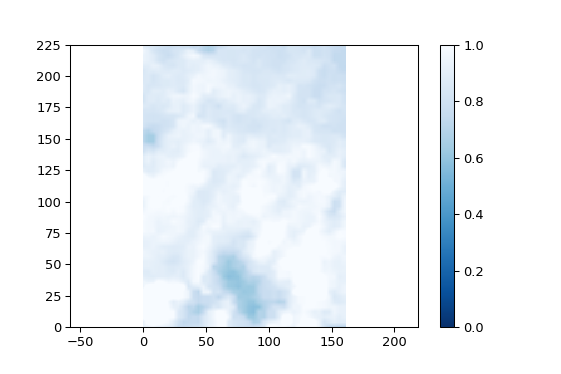

<IPython.core.display.Javascript object>


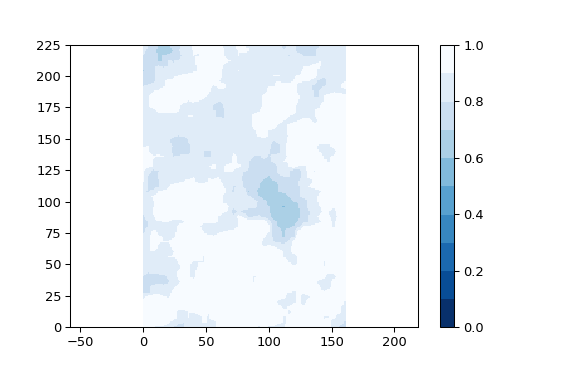

<IPython.core.display.Javascript object>


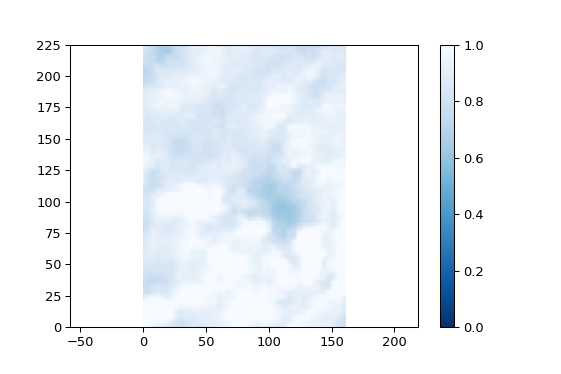

<IPython.core.display.Javascript object>


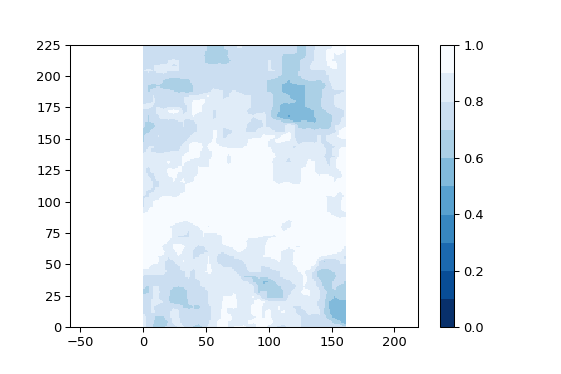

<IPython.core.display.Javascript object>


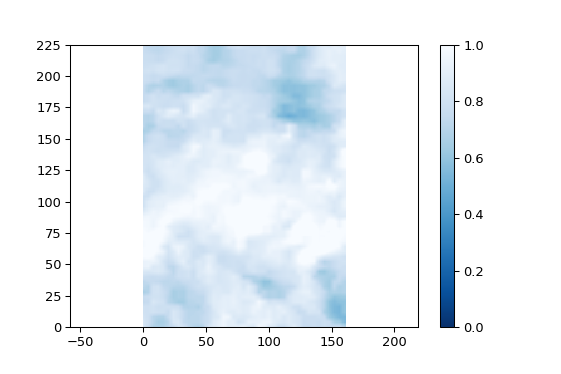

<IPython.core.display.Javascript object>


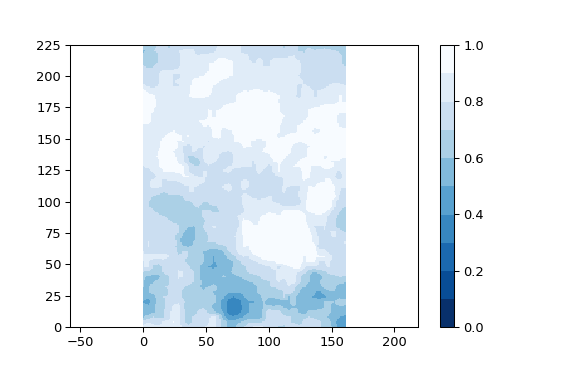

<IPython.core.display.Javascript object>


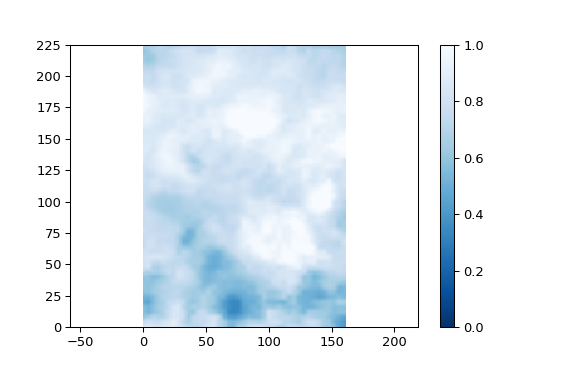

<IPython.core.display.Javascript object>


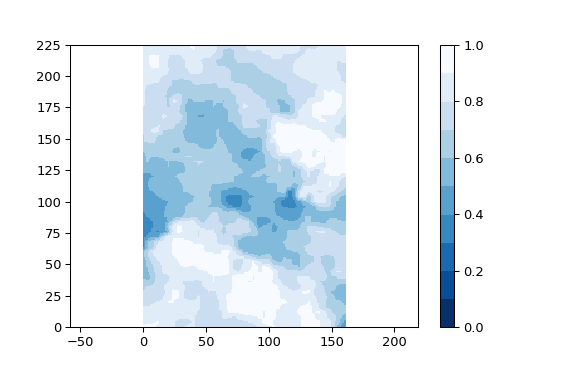

<IPython.core.display.Javascript object>


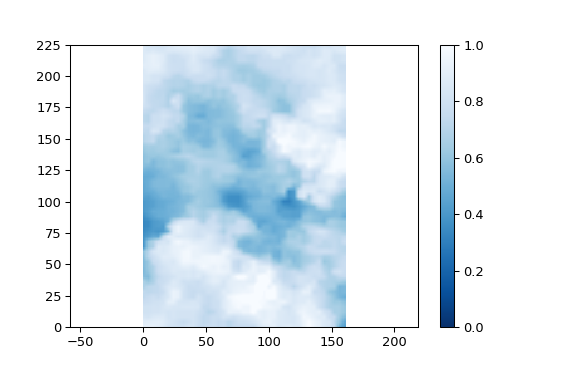

<IPython.core.display.Javascript object>


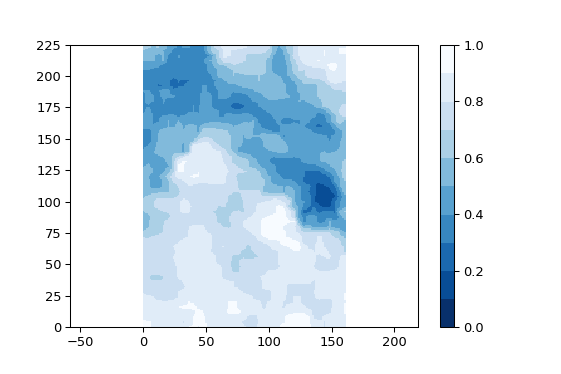

<IPython.core.display.Javascript object>


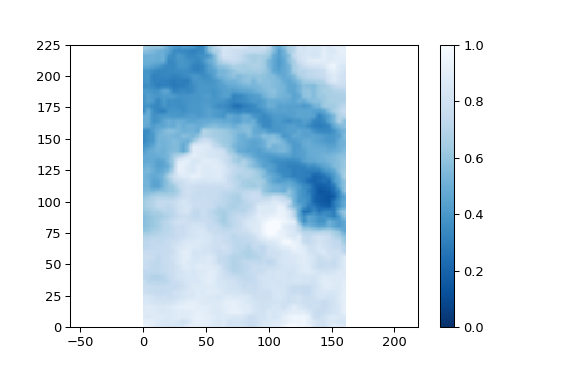

<IPython.core.display.Javascript object>


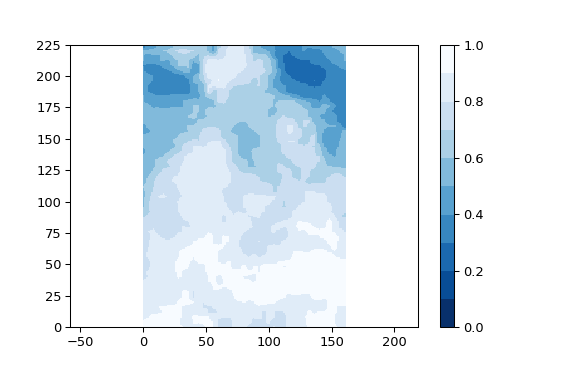

<IPython.core.display.Javascript object>


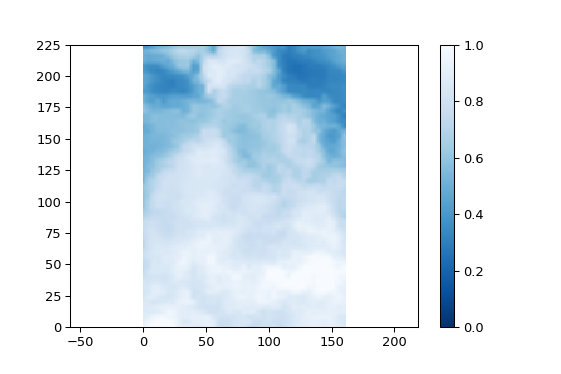

<IPython.core.display.Javascript object>


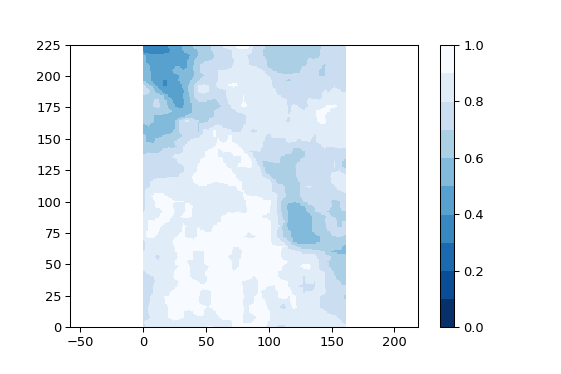

<IPython.core.display.Javascript object>


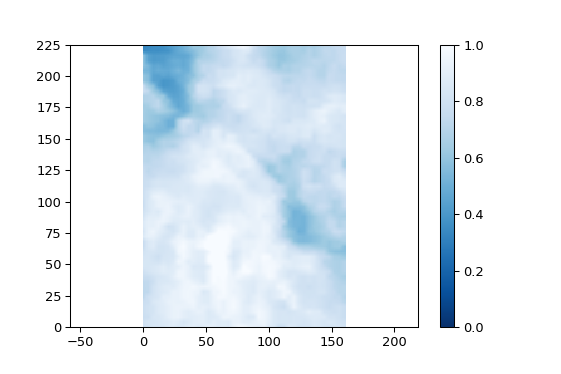

<IPython.core.display.Javascript object>


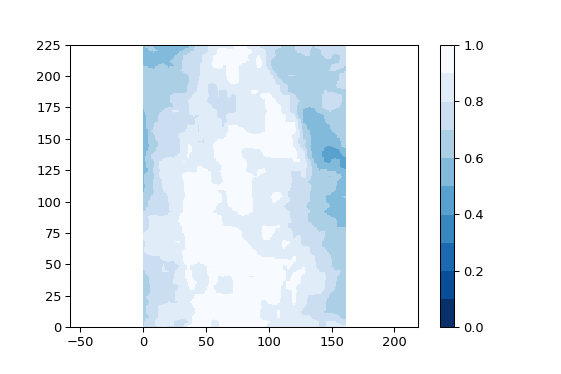

<IPython.core.display.Javascript object>


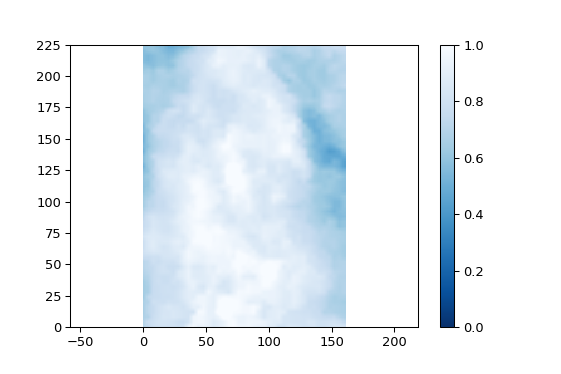

<IPython.core.display.Javascript object>


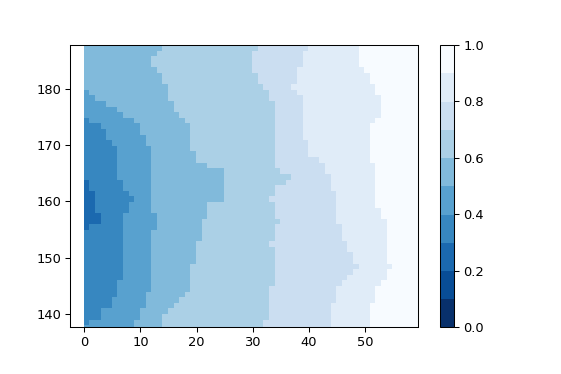

<IPython.core.display.Javascript object>


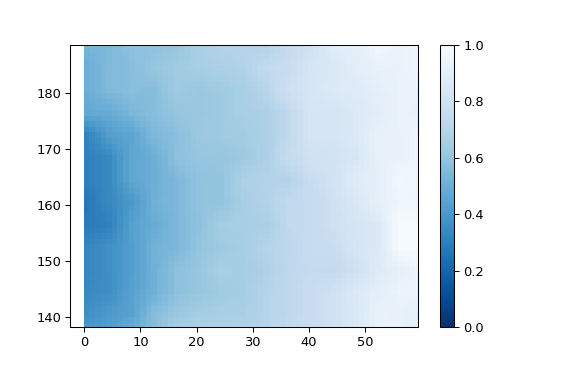

In [128]:
nc = 11
bounds = np.linspace(0, 1, nc)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
for ii in range(int(truth.time.size/2)):
    plt.figure()
    im = plt.pcolormesh(
        truth.isel(time=ii), cmap='Blues_r', norm=norm)
    plt.colorbar(im)
    plt.axis('equal')
    
    plt.figure()
    im = plt.pcolormesh(
        truth.isel(time=ii), cmap='Blues_r', vmin=0, vmax=1)
    plt.colorbar(im)
    plt.axis('equal')

In [95]:
year = 2014
month = 4
day = 9
base_folder = '/a2/uaren/travis/'

In [96]:
truth = xr.open_dataset(f'{base_folder}data/{year:04}/{month:02}/{day:02}/data.nc')

In [97]:
truth = truth['ci']
truth = letkf_io.add_crop_attributes(truth)
truth_full = truth.copy()
truth = analyse_results.return_error_domain(truth)

In [98]:
%matplotlib notebook

In [99]:
from matplotlib import colors

<IPython.core.display.Javascript object>


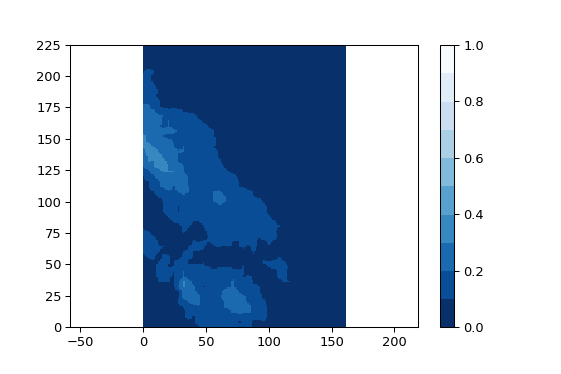

<IPython.core.display.Javascript object>


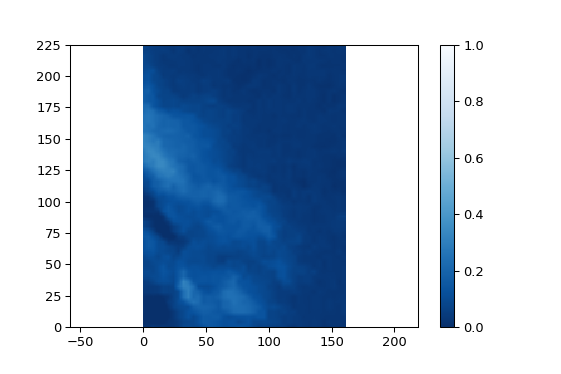

<IPython.core.display.Javascript object>


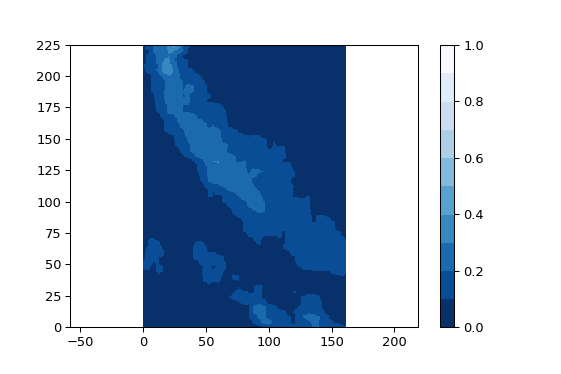

<IPython.core.display.Javascript object>


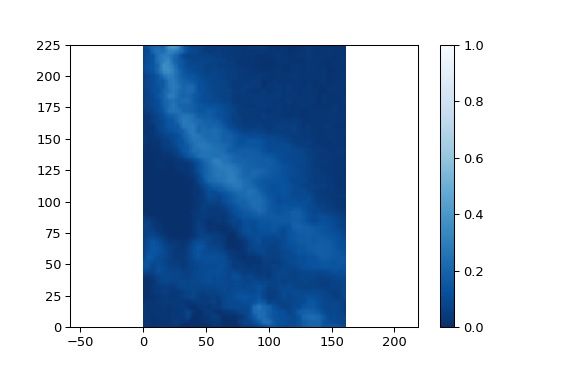

<IPython.core.display.Javascript object>


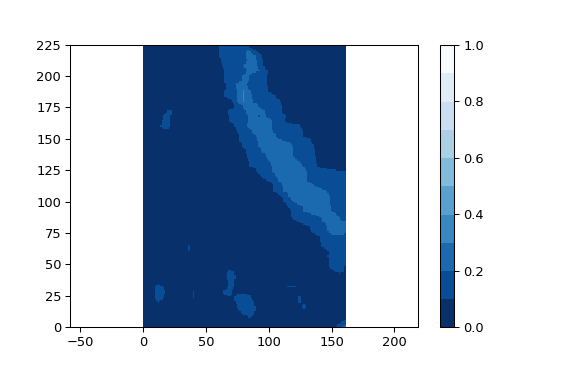

<IPython.core.display.Javascript object>


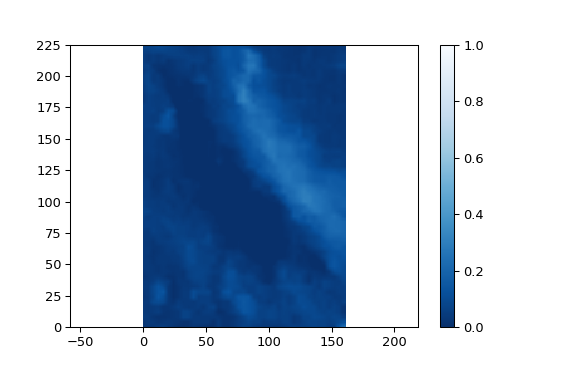

<IPython.core.display.Javascript object>


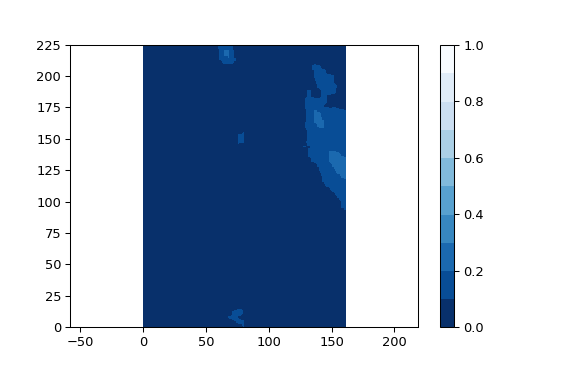

<IPython.core.display.Javascript object>


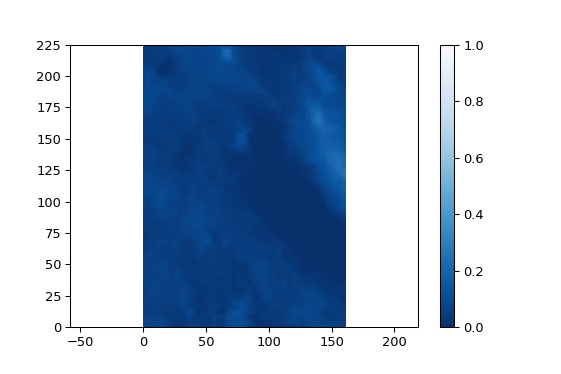

<IPython.core.display.Javascript object>


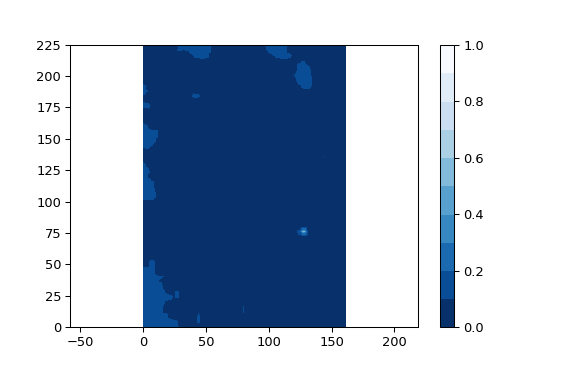

<IPython.core.display.Javascript object>


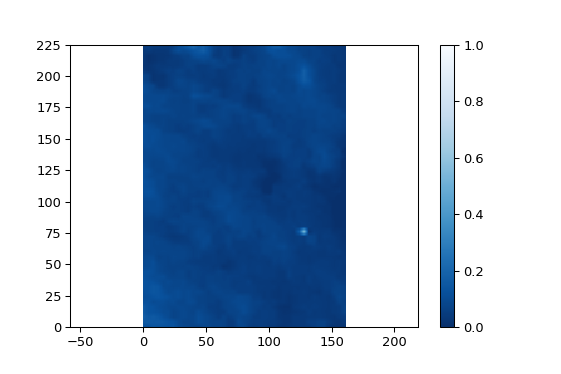

<IPython.core.display.Javascript object>


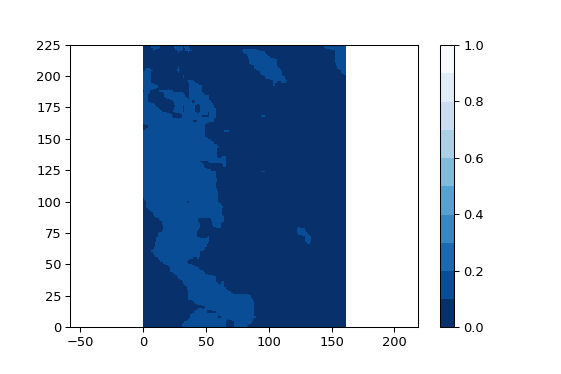

<IPython.core.display.Javascript object>


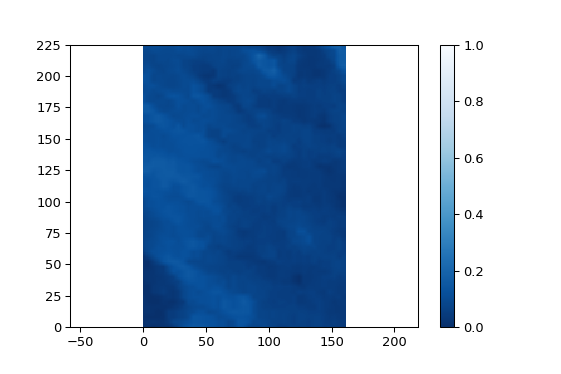

<IPython.core.display.Javascript object>


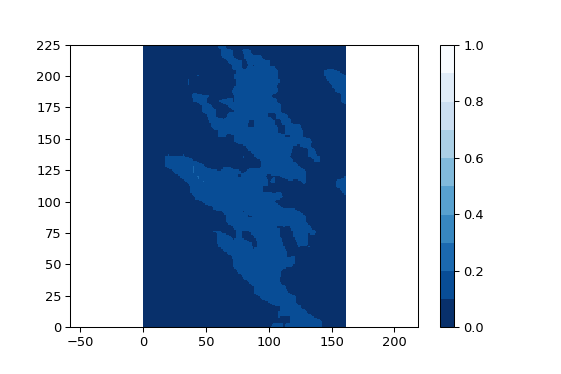

<IPython.core.display.Javascript object>


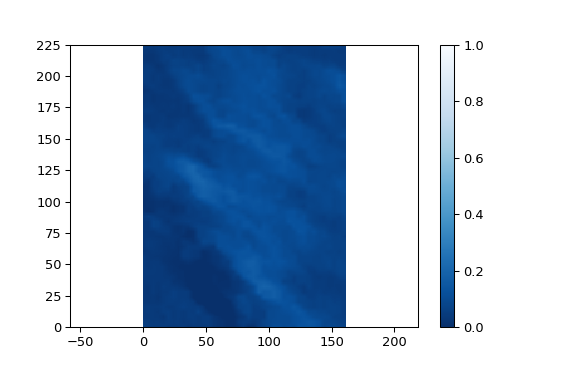

<IPython.core.display.Javascript object>


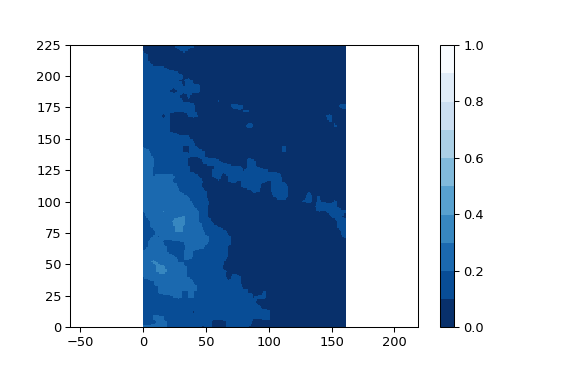

<IPython.core.display.Javascript object>


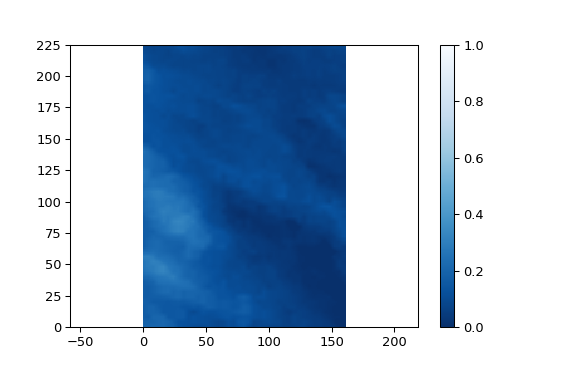

<IPython.core.display.Javascript object>


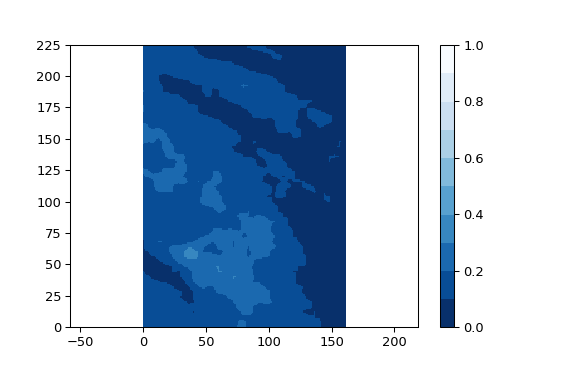

<IPython.core.display.Javascript object>


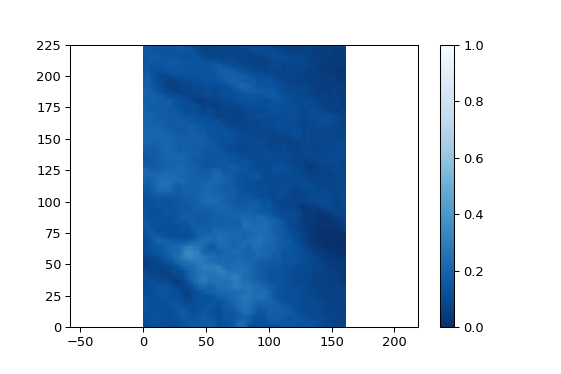

<IPython.core.display.Javascript object>


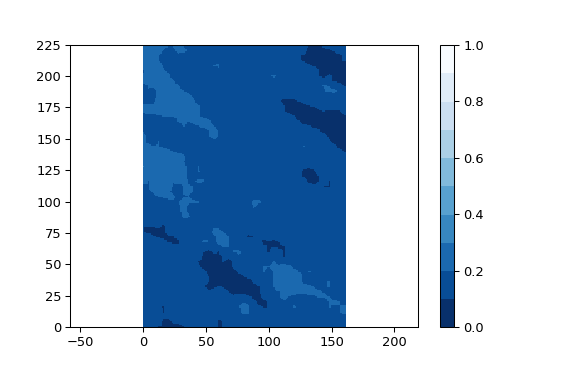

<IPython.core.display.Javascript object>


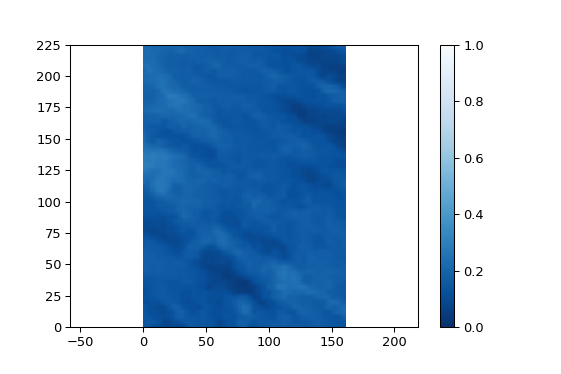

/home/travis/miniconda3/envs/py36letkf/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


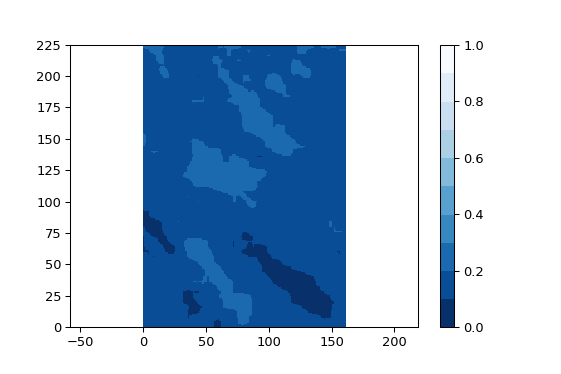

<IPython.core.display.Javascript object>


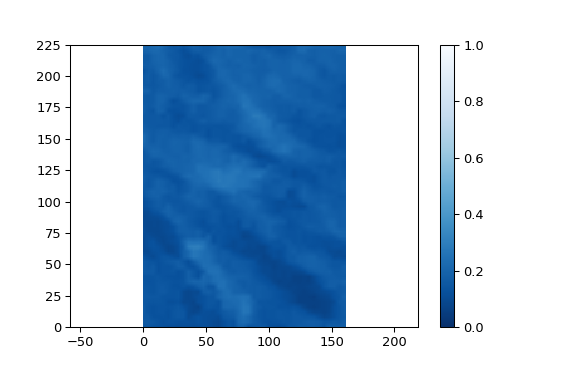

In [100]:
nc = 11
bounds = np.linspace(0, 1, nc)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
for ii in range(int(truth.time.size/2)):
    plt.figure()
    im = plt.pcolormesh(
        truth.isel(time=ii), cmap='Blues_r', norm=norm)
    plt.colorbar(im)
    plt.axis('equal')
    
    plt.figure()
    im = plt.pcolormesh(
        truth.isel(time=ii), cmap='Blues_r', vmin=0, vmax=1)
    plt.colorbar(im)
    plt.axis('equal')